<a href="https://colab.research.google.com/github/aniket-tiwari15/AWARE/blob/main/Aware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input


from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # generate lables automatically for dataset
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras 

In [ ]:
!unzip "/content/drive/MyDrive/finaldatasetkaggle/archive (1).zip"

Streaming output truncated to the last 5000 lines.
  inflating: train1/work_van/00288068.jpg  
  inflating: train1/work_van/00288087.jpg  
  inflating: train1/work_van/00288101.jpg  
  inflating: train1/work_van/00288112.jpg  
  inflating: train1/work_van/00288166.jpg  
  inflating: train1/work_van/00288170.jpg  
  inflating: train1/work_van/00288223.jpg  
  inflating: train1/work_van/00288356.jpg  
  inflating: train1/work_van/00288357.jpg  
  inflating: train1/work_van/00288358.jpg  
  inflating: train1/work_van/00288363.jpg  
  inflating: train1/work_van/00288377.jpg  
  inflating: train1/work_van/00288430.jpg  
  inflating: train1/work_van/00288453.jpg  
  inflating: train1/work_van/00288499.jpg  
  inflating: train1/work_van/00288506.jpg  
  inflating: train1/work_van/00288545.jpg  
  inflating: train1/work_van/00288546.jpg  
  inflating: train1/work_van/00288666.jpg  
  inflating: train1/work_van/00288734.jpg  
  inflating: train1/work_van/00288739.jpg  
  inflating: train1/work_

In [ ]:
input_folder = "/content/train1"
output = "/content/output"

In [ ]:
# we dont have split_folders then we install
!pip install split_folders

In [ ]:
import splitfolders
splitfolders.ratio(input_folder, output=output, seed=12, ratio=(.6, 0.2,0.2)) 
# seed(). Seeds allow you to create a starting point for randomly generated numbers, so that each time your code is run the same answer is generated. The advantage of doing this in your sampling is that you or anyone else can recreate the exact same training and test sets by using the same seed.
# ratio(). is how much % of data you will take for the train, test, validation.

Copying files: 52801 files [00:07, 7272.56 files/s]


In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 155202 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [ ]:
# import matplotlib.pyplot as plt
# from plt import image
# image = image.open('/content/output/train/pickup_truck/00000001.jpg')


In [ ]:
from matplotlib.pyplot import imshow

In [ ]:
cv2.imread('/content/output/train/pickup_truck/00000001.jpg')

array([[[  5,   2,   0],
        [  9,   6,   0],
        [ 26,  20,  13],
        ...,
        [  8,  49,  81],
        [ 21,  54,  87],
        [ 24,  55,  88]],

       [[  5,   2,   0],
        [ 10,   7,   0],
        [ 27,  21,  14],
        ...,
        [ 12,  51,  83],
        [  0,  19,  52],
        [  0,   0,  27]],

       [[  5,   2,   0],
        [ 10,   7,   0],
        [ 27,  21,  14],
        ...,
        [ 27,  67,  96],
        [ 10,  44,  74],
        [  0,  13,  44]],

       ...,

       [[  0,   0,   0],
        [  1,   3,   3],
        [  7,   9,   9],
        ...,
        [124,  94,  83],
        [124,  94,  83],
        [124,  94,  83]],

       [[  0,   0,   0],
        [  1,   3,   3],
        [  7,   9,   9],
        ...,
        [124,  94,  83],
        [124,  94,  83],
        [124,  94,  83]],

       [[  0,   0,   0],
        [  1,   3,   3],
        [  7,   9,   9],
        ...,
        [124,  94,  83],
        [124,  94,  83],
        [124,  94,  83]]

In [ ]:
from google.colab.patches import cv2_imshow

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  68696      0 --:--:-- --:--:-- --:--:-- 68696


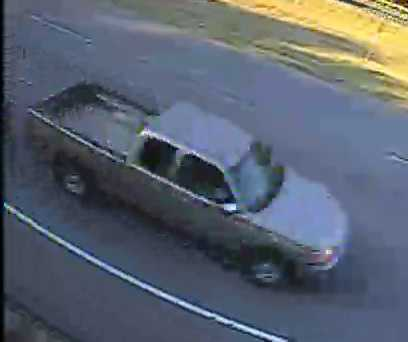

In [ ]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('/content/output/train/pickup_truck/00000001.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/output/train'
valid_path = '/content/output/val'

In [ ]:
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# include_top = false because I want my input and output layer

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
# actually this resnet50 is train model so we dont need to train thats why we set all the layers in resnet is already trained so we dont need to train
# trainable is a parameter thats train resnet layer we set to false this parameter because its already trained
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
# usefull for getting the number of classes
# The glob. glob returns the list of files with their full path
from glob import glob
folder = glob('/content/output/train/*')
folder

['/content/output/train/bus',
 '/content/output/train/pickup_truck',
 '/content/output/train/work_van',
 '/content/output/train/car',
 '/content/output/train/articulated_truck',
 '/content/output/train/background',
 '/content/output/train/pedestrian',
 '/content/output/train/motorcycle',
 '/content/output/train/non-motorized_vehicle',
 '/content/output/train/bicycle',
 '/content/output/train/single_unit_truck']

In [ ]:

x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folder), activation='softmax')(x)

In [ ]:
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  #  shear_range = 0.2,
                                  #  zoom_range = 0.2,
                                  #  horizontal_flip = True
                                   )

test_datagen = ImageDataGenerator(rescale = 1./255)

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
batch_size = 32

In [ ]:
training_set = train_datagen.flow_from_directory('/content/output/train',
                                                 target_size = (224, 224),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

Found 31677 images belonging to 11 classes.


In [ ]:
# here we want to check the shape of image
training_set.image_shape

(224, 224, 3)

In [ ]:
test_set = test_datagen.flow_from_directory('/content/output/test',
                                            target_size = (224, 224),
                                            batch_size = batch_size,
                                            class_mode = 'categorical')

Found 10567 images belonging to 11 classes.


In [ ]:
validation_set = validation_datagen.flow_from_directory('/content/output/val',
                                            target_size = (224, 224),
                                            batch_size = batch_size,
                                            class_mode = 'categorical')

Found 10557 images belonging to 11 classes.


In [ ]:
# fit the model
# Run the cell. 
model = model.fit(
  training_set,
  validation_data=validation_set,
  epochs=20,
  verbose=1,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set)
)
# this process take <=2hr time to complete this process.  

Epoch 1/20
990/990 [==============================] - 307s 310ms/step - loss: 2.0676 - accuracy: 0.4453 - val_loss: 1.2481 - val_accuracy: 0.5995
Epoch 2/20
990/990 [==============================] - 304s 307ms/step - loss: 1.8007 - accuracy: 0.5323 - val_loss: 1.4501 - val_accuracy: 0.5682
Epoch 3/20
990/990 [==============================] - 303s 306ms/step - loss: 1.6290 - accuracy: 0.5732 - val_loss: 2.9163 - val_accuracy: 0.4129
Epoch 4/20
990/990 [==============================] - 304s 307ms/step - loss: 1.5565 - accuracy: 0.5986 - val_loss: 1.6120 - val_accuracy: 0.5628
Epoch 5/20
990/990 [==============================] - 304s 307ms/step - loss: 1.4604 - accuracy: 0.6234 - val_loss: 2.0110 - val_accuracy: 0.5435
Epoch 6/20
990/990 [==============================] - 303s 306ms/step - loss: 1.4704 - accuracy: 0.6295 - val_loss: 1.2549 - val_accuracy: 0.6533
Epoch 7/20
990/990 [==============================] - 303s 306ms/step - loss: 1.3637 - accuracy: 0.6544 - val_loss: 2.0050 -

In [ ]:
# import pylab as plt

# plt.imshow(test_set[122])
# plt.show()

In [ ]:
# score = model.evaluate(test_set, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

In [ ]:
pickup_truck = list(data_dir.glob('pickup_truck/*'))
print(pickup_truck[0])
PIL.Image.open(str(pickup_truck[0]))

In [ ]:
# # plot the loss
# plt.plot(model.history['loss'], label='train loss')
# plt.plot(model.history['val_loss'], label='val loss')
# plt.legend()
# plt.show()
# plt.savefig('LossVal_loss')

# # plot the accuracy
# plt.plot(model.history['accuracy'], label='train acc')
# plt.plot(model.history['val_accuracy'], label='val acc')
# plt.legend()
# plt.show()
# plt.savefig('AccVal_acc')

In [ ]:
import cv2
image = cv2.imread(str(pickup_truck[0]))
image_resized = cv2.resize(image,(IMAGE_SIZE))
image= np.expand_dims(image_resized,axis=0)
print(image.shape)

In [ ]:
# image=np.expand_dims(image_resized,axis=0)
# print(image.shape)


In [ ]:
pred = model.predict(image)
print(pred)

In [ ]:
# # save it as a h5 file


# from tensorflow.keras.models import load_model

# model.save('model_resnet50.h5')

In [ ]:
# y_pred = model.predict(test_set)

In [ ]:
# y_pred

In [ ]:
# import numpy as np
# y_pred = np.argmax(y_pred, axis=1)